# Project #2
##Name: Hmingthan Zama

Proposed Points (out of 25): 25

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

The dataset I chose contains a list of 2000 of univerities around the world. There are 9 columns in total and I will be using predictor variables national rank, education rank, employability rank, faculty rank, research rank, and score to test how effective they are at predicting a university's world ranking (target variable). Given the target variable as well as all predicator variables used are numerical values, I will be using a regressor model specifically MSE to help me.



Explanation of columns from kaggle:


**Education: **
*based on the academic success of a university’s alumni, and measured by the number of a university's alumni who have won prestigious academic distinctions relative to the university's size (25%)*

**Employability: **
*based on the professional success of a university’s alumni, and measured by the number of a university's alumni who have held top positions at major companies relative to the university's size (25%)*

**Faculty: **
*measured by the number of faculty members who have won prestigious academic distinctions (10%)*
Research:

i) Research Output: 
*measured by the total number of research papers (10%)*
ii) High-Quality Publications: 
*measured by the number of research papers appearing in top-tier journals (10%)*
iii) Influence:
*measured by the number of research papers appearing in highly-influential journals (10%)*
iv) Citations: 
*measured by the number of highly-cited research papers (10%)*


I got this dataset from [kaggle.](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

First, I checked for any null or nan values in my dataset. Fortunately, I found none. 

Then I dropped the columns I was not using ('Institution' and 'Location'). Also, another reason I did this because I was unable to use standardscaler to normalize my data because the dataset contained string/object datatypes. I had to first remove these categorical columns.

I then used code I found inside the kaggle dataset to rename the predictor variables. Bascially just replaced the space between variable names with a _ instead. Looked better and easily to read.

I then split the data into training and testing data. My predictor variables were National_Rank, Education_Rank, Employability_Rank, Faculty_Rank, Research_Rank, and Score. My target variable was World_Rank.

I used a dummy regressor to get a baseline that I could compare my results with later on. This essentially grabs the average of the target variable. I found the MSE and R squared values for both.

As mentioned above, I turned object datatypes into integer so I could use standardscaler to fit and normalize the data.

In [2]:
# load and prepare your data here
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

#sk learn imports
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

path = '/content/drive/MyDrive/Colab Notebooks/CS167Datasets/WORLD UNIVERSITY RANKINGS.csv'
data = pd.read_csv(path)

import numpy as np # linear algebra

Mounted at /content/drive


In [3]:
data.isna().any() #checking for na values. Found none

World Rank            False
Institution           False
Location              False
National Rank         False
Education Rank        False
Employability Rank    False
Faculty Rank          False
Research Rank         False
Score                 False
dtype: bool

In [4]:
data.isnull().sum() #checking for null values. Found none.

World Rank            0
Institution           0
Location              0
National Rank         0
Education Rank        0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [53]:
# drops columns that I am not using.
# https://stackoverflow.com/questions/13411544/why-does-the-dot-notation-does-not-work-for-deleting-a-column-from-a-pandas-data
data.drop('Institution', axis=1, inplace=True)

In [54]:
data.drop('Location', axis=1, inplace=True)

In [55]:
# Optional renaming columns for clarity
data.rename(columns = {'National Rank':'National_Rank','Education Rank':'Education_Rank','Employability Rank':'Employability_Rank'
,'Faculty Rank':'Faculty_Rank','Research Rank':'Research_Rank','World Rank':'World_Rank'}, inplace = True)

# Code found inside kaggle 
#https://www.kaggle.com/code/melikedilekci/eda-world-university-ranking/notebook

In [56]:
#Splitting data into test and training data.
predictors = ['National_Rank', 'Education_Rank','Employability_Rank', 'Faculty_Rank', 'Research_Rank', 'Score']
target = "World_Rank"
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

In [59]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics

# build and test a baseline model here
dummy_regr = DummyRegressor() # will always predict the average of the target
dummy_regr.fit(train_data, train_sln)
dummy_preds = dummy_regr.predict(test_data)

#Calculating the mean squared error and R^2
print('MSE: ', metrics.mean_squared_error(test_sln, dummy_preds))
print('R Squared: ', metrics.r2_score(test_sln, dummy_preds))
#This is target. Want to get lower than this MSE and r^2. If above then model is not doing well.
#this is point of reference 
print('ACTUAL                    \tPREDICTIONS')
for i in range(10):
  print(dummy_preds[i],"\t\t", test_sln.iloc[i])

MSE:  345541.6247515625
R Squared:  -0.020226893570883808
ACTUAL                    	PREDICTIONS
983.94625 		 752
983.94625 		 1546
983.94625 		 882
983.94625 		 397
983.94625 		 510
983.94625 		 1218
983.94625 		 417
983.94625 		 1702
983.94625 		 1448
983.94625 		 10


In [60]:
data.dtypes #Checking datatypes. 

World_Rank            int64
National_Rank         int64
Education_Rank        int64
Employability_Rank    int64
Faculty_Rank          int64
Research_Rank         int64
Score                 int64
dtype: object

In [61]:
# Update. Still don't understand how this didn't work but the one below did??
#https://datatofish.com/string-to-integer-dataframe/
# Failed attempts to convert from object type to numeric values. This is important because only numeric values can be normalized using
# standardscaler.
#data['Education_rank','Employability_Rank','Faculty_Rank','Research_Rank','Score'].astype(str).astype(int)
#data[['Education_rank', 'Employability_Rank', 'Faculty_Rank', 'Research_Rank', 'Score']] = data[['Education_Rank', 'Employability_Rank', 'Faculty_Rank','Research_Rank', 'Score']].astype(str).astype(int)
#data["Education_Rank"] = data["Education_Rank"].astype(float)
#data['Education_Rank'] = data['Education_Rank'].astype(int)
#data['Education_Rank'] = pd.to_numeric(data['Education_Rank'])


In [62]:
# Maybe this was the reason the code below works??
data=data.replace('-', 2001)
# https://www.kaggle.com/code/sasakitetsuya/world-universities-clustering-pca-analysis

In [63]:
# This works?? idk why. I tried the exact same code above?? But whatever.
# source: https://www.kaggle.com/code/sasakitetsuya/world-universities-clustering-pca-analysis
data['Education_Rank']=data['Education_Rank'].astype(int)
data['Employability_Rank']=data['Employability_Rank'].astype(int)
data['Faculty_Rank']=data['Faculty_Rank'].astype(int)
data['Research_Rank']=data['Research_Rank'].astype(int)
data['Score']=data['Score'].astype(int)




In [64]:
# Checking datatypes again. Finally got integer values. Meaning I can use standardscaler to normalize
data.dtypes

World_Rank            int64
National_Rank         int64
Education_Rank        int64
Employability_Rank    int64
Faculty_Rank          int64
Research_Rank         int64
Score                 int64
dtype: object

In [67]:
#Normalizing the data
# Was also important that I drop the unused object datatypes here or else I cant fit correctly. I Kept getting error.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

# 3. Research

Put your code and your experiments here.

In [69]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.

# Non-Normalized models
knn = neighbors.KNeighborsRegressor()
w_knn = neighbors.KNeighborsRegressor(weights = 'distance')
dt = tree.DecisionTreeRegressor(max_depth = 3)
R_forest = RandomForestRegressor()

#Call fit()
knn.fit(train_data, train_sln)
w_knn.fit(train_data, train_sln)
dt.fit(train_data, train_sln)
R_forest.fit(train_data, train_sln)

#Get Predictions
knn_Pred = knn.predict(test_data)
w_knn_Pred = w_knn.predict(test_data)
dt_Pred = dt.predict(test_data)
R_forest_Pred = R_forest.predict(test_data)

#Evaluate the model
#Mean Squared Error
print("kNN MSE:           ", metrics.mean_squared_error(knn_Pred, test_sln))
print("w_kNN MSE:         ", metrics.mean_squared_error(w_knn_Pred, test_sln))
print("DT MSE: ", metrics.mean_squared_error(dt_Pred, test_sln))
print("RF MSE:        ", metrics.mean_squared_error(R_forest_Pred, test_sln))

#R^2 
print('kNN r squared:          ', metrics.r2_score(knn_Pred, test_sln))
print('w_kNN r squared:        ', metrics.r2_score(w_knn_Pred, test_sln))
print('DT r squared:', metrics.r2_score(dt_Pred, test_sln))
print('RF r squared:       ', metrics.r2_score(R_forest_Pred, test_sln))

kNN MSE:            10484.6284
w_kNN MSE:          7804.072847195179
DT MSE:  6309.133053253904
RF MSE:         333.17660899999987
kNN r squared:           0.9680174661297506
w_kNN r squared:         0.9763314152158543
DT r squared: 0.980522549309084
RF r squared:        0.999015210372798


In [70]:
# Normalized data
#Create model
n_knn = neighbors.KNeighborsRegressor()
n_w_knn = neighbors.KNeighborsRegressor( weights = 'distance')
n_dt = tree.DecisionTreeRegressor(max_depth = 3)
n_R_forest = RandomForestRegressor()

#Call fit()
n_knn.fit(train_data_normalized, train_sln)
n_w_knn.fit(train_data_normalized, train_sln)
n_dt.fit(train_data_normalized, train_sln)
n_R_forest.fit(train_data_normalized, train_sln)

#Get Predictions
n_knn_Pred = n_knn.predict(test_data_normalized)
n_w_knn_Pred = n_w_knn.predict(test_data_normalized)
n_dt_Pred = n_dt.predict(test_data_normalized)
n_R_forest_Pred = n_R_forest.predict(test_data_normalized)

#Evaluate the model


#Mean Squared Error
print("kNN MSE:           ", metrics.mean_squared_error(n_knn_Pred, test_sln))
print("w_kNN MSE:         ", metrics.mean_squared_error(n_w_knn_Pred, test_sln))
print("DT MSE: ", metrics.mean_squared_error(n_dt_Pred, test_sln))
print("RF MSE:        ", metrics.mean_squared_error(n_R_forest_Pred, test_sln))

#R^2 
print('kNN r squared:          ', metrics.r2_score(n_knn_Pred, test_sln))
print('w_kNN r squared:        ', metrics.r2_score(n_w_knn_Pred, test_sln))
print('DT r squared:', metrics.r2_score(n_dt_Pred, test_sln))
print('RF r squared:       ', metrics.r2_score(n_R_forest_Pred, test_sln))

kNN MSE:            8089.1277
w_kNN MSE:          6506.709394176504
DT MSE:  6309.133053253904
RF MSE:         322.517389
kNN r squared:           0.9751207118818589
w_kNN r squared:         0.9801057153258348
DT r squared: 0.980522549309084
RF r squared:        0.9990468801486199


[5262.365, 5405.410625, 6002.778333333333, 6938.74078125, 8089.1277, 8764.175138888888, 9531.984336734695, 9858.3226953125, 10430.091944444444, 10795.237050000002, 11188.238636363636, 11290.3828125, 12286.245502958582, 12603.76024234694, 13146.478555555555, 13529.78048828125, 14300.102275086507, 14614.800455246912, 15225.925927977842, 15528.205743749999, 15955.751315192743, 16415.402381198346, 16989.522202268432, 17016.39321614583, 17346.238104, 17277.80905695266, 17297.65267489712, 17478.145172193876, 17462.904024970274, 17412.966155555554, 17471.005015608738, 17725.399663085936, 17670.3657805326, 17939.310043252593, 17942.217775510206, 18133.86216820988, 18204.82094229364, 18193.200929709143, 18125.745667324125, 18030.119314062504, 18149.23729625223, 18097.80324546485, 17982.411636019468, 18019.52842716942, 18171.364603703703, 18076.092568525524, 18018.194383205067, 17863.06931206597, 17854.339161807577, 17786.770887000002, 17756.445223952327, 17654.23355491864, 17770.551875222503, 1

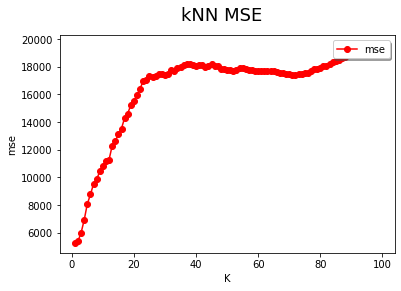

In [72]:
import matplotlib.pyplot as plt
kNN_mse = []
for i in range (1, 100):
  knn= neighbors.KNeighborsRegressor(n_neighbors=i)
  knn.fit(train_data_normalized, train_sln)
  knn_Pred= knn.predict(test_data_normalized)
  knn_mse = metrics.mean_squared_error(test_sln, knn_Pred)
  kNN_mse.append(knn_mse)
print(kNN_mse)

xvals = range(1, 100)
plt.suptitle('kNN MSE', fontsize=18)
plt.xlabel('K')
plt.ylabel('mse')
plt.plot(xvals, kNN_mse, 'ro-', label='mse')
plt.legend(loc='upper right', shadow=True)
plt.show()

[5262.365, 4968.753530239606, 4984.7703996203745, 5717.444506010495, 6506.709394176504, 6898.903172866457, 7347.98143038705, 7573.11996148809, 7878.653181199308, 8034.016948656411, 8131.263056251197, 8208.498503920438, 8771.344407883955, 8909.42966415956, 9143.25977417923, 9340.275476727717, 9733.245046719563, 9966.852080074346, 10360.856309429882, 10588.578502453012, 10826.691039191495, 11171.39159762042, 11498.342504442902, 11599.367916983732, 11778.316394775924, 11872.697044360928, 11898.568401379254, 12046.045533867458, 12097.595652726279, 12121.229545348706, 12170.406522603915, 12357.956789010792, 12327.503506752435, 12529.044727745606, 12553.771739673437, 12693.908924632082, 12740.474938563004, 12757.74093152128, 12787.656639866607, 12768.708780882742, 12867.054153265124, 12834.098703258014, 12779.872957397312, 12839.995716305011, 12937.942561211157, 12880.498871883028, 12856.895593274803, 12796.026472416741, 12791.159447839636, 12786.572190586086, 12778.595093899094, 12717.07451

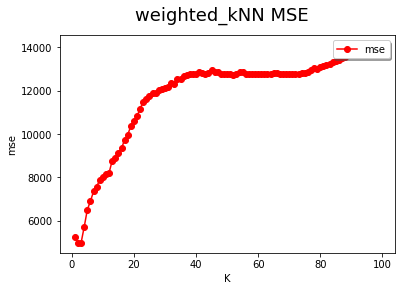

In [75]:
import matplotlib.pyplot as plt
kNN_mse = []
for i in range (1, 100):
  knn= neighbors.KNeighborsRegressor(n_neighbors=i, weights = 'distance')
  knn.fit(train_data_normalized, train_sln)
  knn_Pred= knn.predict(test_data_normalized)
  knn_mse = metrics.mean_squared_error(test_sln, knn_Pred)
  kNN_mse.append(knn_mse)
print(kNN_mse)

xvals = range(1, 100)
plt.suptitle('weighted_kNN MSE', fontsize=18)
plt.xlabel('K')
plt.ylabel('mse')
plt.plot(xvals, kNN_mse, 'ro-', label='mse')
plt.legend(loc='upper right', shadow=True)
plt.show()

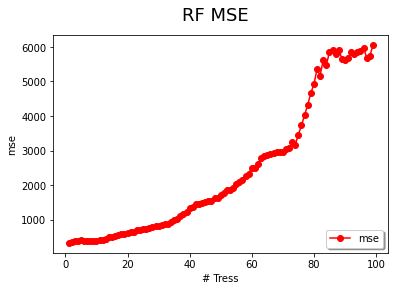

In [73]:
from sklearn.ensemble import RandomForestRegressor
RF_list = []

for i in range (1, 100):
  n_forest = RandomForestRegressor(min_samples_leaf = i)
  n_forest.fit(train_data_normalized, train_sln)
  n_forest_preds = n_forest.predict(test_data_normalized)
  n_mse=metrics.mean_squared_error(test_sln, n_forest_preds)
  RF_list.append(n_mse)

xvals = range(1, 100)
plt.suptitle('RF MSE', fontsize=18)
plt.xlabel('# Tress')
plt.ylabel('mse')
plt.plot(xvals, RF_list, 'ro-', label='mse')
plt.legend(loc='lower right', shadow=True)
plt.show()

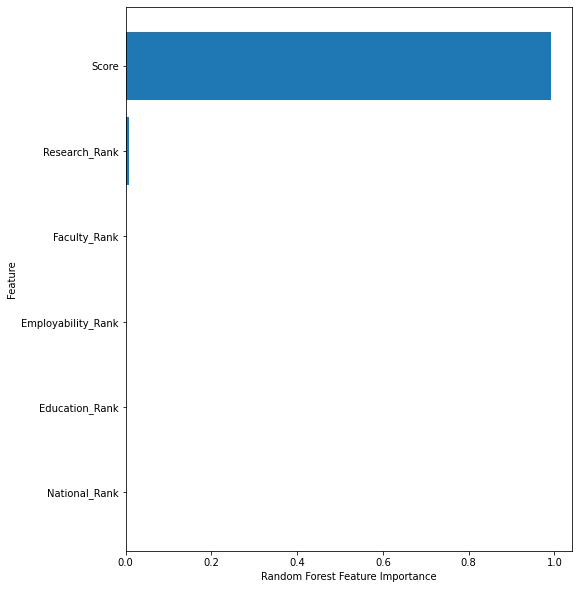

In [76]:
# Include code to show your results (graphs, etc)
# checking how important each of the features was in the ensemble of models we built.

import matplotlib.pyplot as plt
%matplotlib inline

index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,n_R_forest.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

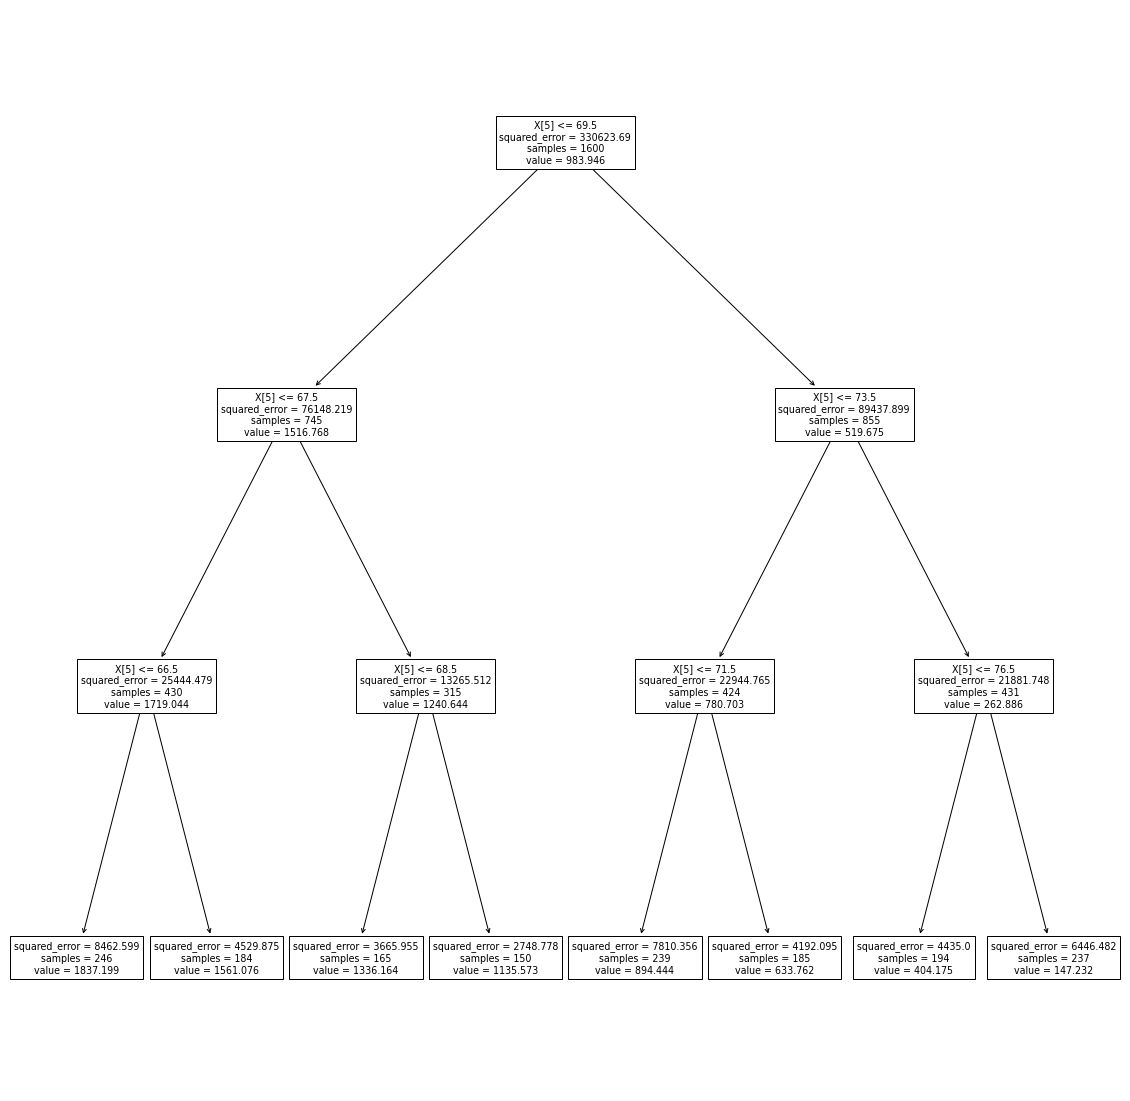

In [77]:
# visualizing decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20)) # Makes it so the graph isn't tiny
tree.plot_tree(dt); #if you remove the ;, you'll get more information about the tree

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

I found out that the best model to predict World_Rank was the normalized random forest model. This is because it has the lowest MSE score of 'just" 322.517389. This number might seem very high, however, it is alot lower than the amount of 345541.6247515625 given when I ran the dummy regressor. Also, the 322 number is alot lower compared to the other models and there is a decrease in MSE value amongst the normalized and non-normalized results. It is clear that the normalized datasets have a lower MSE which is what we want.

The worst model was the kNN model. It had very high MSE values before and after normalization. Although the value did dropped from 10484.6284 to 8089.1277, it was still a high number thus diminishing the efforts of the model.

What I found interesting (but not surprising) was when I graphed the Random Forest Feature Importance and the result had 'Score' as the overwhelming highest. The reason for why score is the highest is pretty self explanatory but it was still interesting to see that that column was basically responsible for all the influence.

Putting MSE values aside, the R squared values for all models I tested looked very promosing. The R Squared values for every model before and after normalization is in the high 90s. This result can be seen in the Feature Importance graph where I found out that 'Score' is responsible for most of that accuracy.

What I would do differently in the future is perhaps remove 'Score' as a predictor variable because it currently has too much influence over the other predictor variables at the moment. I'd like to see how the Feature Importance graph looks and what the real r squared values would be.

Overall, the model is a good predicator of World_Rank but like I mentioned, it was clear that the 'Score' variable was how that was determined according to our results.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

I spent alot more time in the data preparation phase of the project. The biggest issue I encountered was when I tried to normalize using standardscaler the first time, I got an error saying that I could not use fit on string objects. I spent a good amount of time googling and finding a way (was told to use as.type or .to_numeric to change datatypes from objects to integers. However, this did not work for some reason. I then browsed the kaggle dataset and found where someone encountered and solved the same issue. The funny thing was, they fixed it by using as.type so I'm not sure what I did wrong that they did correctly. I compared my code and theirs and it looked the same? Anyways, I tried to run standardscaler after converting my object values to integers and I ran into another issue which was that my dataset still contained categorical values. Although I did not use the 'Institution' and 'Location' columns, they were somehow getting in the way so I ended up dropping them permanently. I was finally able to use standardscaler.

Other than that, I follwed the same format I did for project 1 and everything ran smoothly except it was just a different dataset. 